## Case: Forecast Mircosoft 'MSFT' future stock prices for every trading day a year ahead. 

### 1. Import libraries

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

### 2. We will use the data for Microsoft (‘MSFT’) from Yahoo Finance for the period ‘2000-1-1’ until today.

In [2]:
stock = 'MSFT' 
data = pd.DataFrame()
data[stock] = wb.DataReader(stock, data_source='yahoo', start='2000-1-1')['Adj Close']

data.head()

,MSFT
Date,
1999-12-31,37.162327
2000-01-03,37.102634
2000-01-04,35.849308
2000-01-05,36.227283
2000-01-06,35.013741


### 3. Calculating Log Returns

$$
ln(\frac{P_t}{P_{t-1}})
$$

In [3]:
log_returns = np.log(1 + data.pct_change())

log_returns.head()

,MSFT
Date,
1999-12-31,NaN
2000-01-03,-0.001608
2000-01-04,-0.034364
2000-01-05,0.010488
2000-01-06,-0.034072


In [4]:
log_returns.tail()

,MSFT
Date,
2020-11-20,-0.009602
2020-11-23,-0.001332
2020-11-24,0.017690
2020-11-25,0.000047
2020-11-27,0.006339


### Plot the stock prices for MSFT 

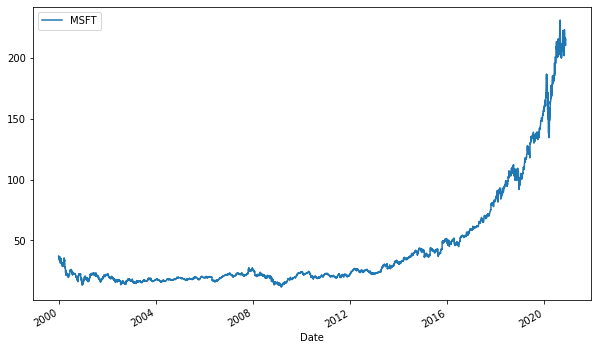

In [5]:
data.plot(figsize=(10, 6));

### Plot the log returns for MSFT

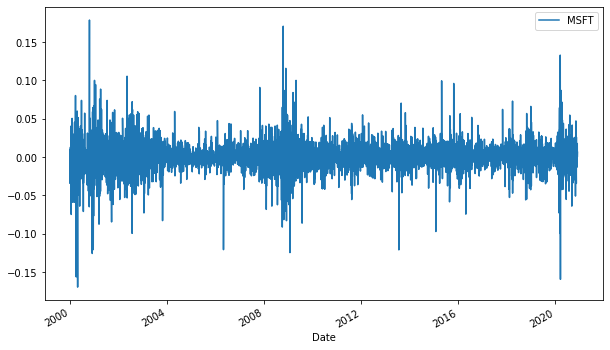

In [6]:
log_returns.plot(figsize = (10, 6))

### 4. Evaluating average of log returns 

In [7]:
u = log_returns.mean()
u

MSFT    0.000334
dtype: float64

### 5. Evaluating variance of log returns

In [8]:
var = log_returns.var()
var

MSFT    0.000381
dtype: float64

### 6. Calculate the drift, using the following formula: 

$$
drift = u - \frac{1}{2} \cdot var
$$

In [9]:
drift = u - (0.5 * var)
drift

MSFT    0.000143
dtype: float64

### 7. Calculate the standard deviation

In [10]:
stdev = log_returns.std()
stdev

MSFT    0.019516
dtype: float64

******

In [11]:
type(drift) # drift is pandas series presently, which needs to be converted to array

pandas.core.series.Series

In [12]:
type(stdev) # stdev is pandas series presently, which needs to be converted to array

pandas.core.series.Series

In [13]:
np.array(drift) # we can use np.array 

array([0.00014343])

In [14]:
drift.values # we can also use .values

array([0.00014343])

In [15]:
stdev.values

array([0.01951562])

### 8. We will understand certain functions to use ahead
#### The method norm.ppf() takes a percentage and returns a standard deviation multiplier for what value that percentage occurs at.

In [16]:
norm.ppf(0.95)

1.6448536269514722

#### NOTE: This means 95% of the data is 1.644 σ from mean

#### np.random.rand will help in creating matrix with random values between 0 and 1

In [17]:
x = np.random.rand(10, 2)
x

array([[0.5802146 , 0.47929339],
       [0.53039772, 0.97090955],
       [0.69369207, 0.08286996],
       [0.80411308, 0.69161923],
       [0.30431746, 0.87991945],
       [0.77449962, 0.11046074],
       [0.43980991, 0.6287383 ],
       [0.13671741, 0.65415838],
       [0.99785671, 0.66285379],
       [0.19429403, 0.17327024]])

In [18]:
norm.ppf(x) 

array([[ 0.20244252, -0.05192709],
       [ 0.07626965,  1.89433245],
       [ 0.50634304, -1.38602285],
       [ 0.85640491,  0.50044532],
       [-0.51202298,  1.1745842 ],
       [ 0.75374764, -1.2240815 ],
       [-0.15145119,  0.32851354],
       [-1.09518679,  0.3965718 ],
       [ 2.85626399,  0.42026424],
       [-0.86218076, -0.94132079]])

In [19]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.43615908, -1.73270102],
       [-1.78530629,  1.69313418],
       [ 1.3924045 ,  1.78699766],
       [ 0.87920014,  0.10928083],
       [ 0.55188898,  0.69237222],
       [-0.35403007, -0.68472977],
       [-0.92034918, -0.48526713],
       [-0.44978633, -0.29887363],
       [-1.01093155,  0.95522941],
       [-0.57159041,  0.27773689]])

### 9. We will now proceed to forecaste stock prices using the functions we have used above

#### To forecast future stock prices for every trading day a year ahead we will assign 250 as interval. We will examine 10 possible outcomes so will we will perform 10 iterations

#### Use the formula we have provided and calculate daily returns.

<br />
$$
daily\_returns = exp({drift} + {stdev} * z), 
$$ 
<br>
$$
where\  z = norm.ppf(np.random.rand(t\_intervals, iterations)
$$

In [20]:
t_intervals = 250
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [21]:
daily_returns 

array([[1.0266548 , 1.01406324, 0.9964837 , ..., 0.99324061, 0.99207345,
        0.97666491],
       [0.99964611, 1.00387209, 0.98189056, ..., 0.97413891, 1.00001104,
        1.00984938],
       [1.01928903, 1.01390934, 0.98345389, ..., 1.01869787, 0.97485578,
        0.99310322],
       ...,
       [1.01754418, 1.01832408, 1.01630036, ..., 1.02322015, 1.00313136,
        1.05001718],
       [0.96836868, 1.04285173, 1.0010831 , ..., 1.00212496, 0.97236439,
        0.98828391],
       [1.04225117, 0.98819678, 1.0062875 , ..., 0.99524743, 0.98741655,
        0.98953869]])

***

### We will use the simple logic that:  price_t+1 = price_t * daily_return_t 

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



#### Create a variable S0 equal to the last adjusted closing price of Microsoft using the “iloc” method

In [22]:
S0 = data.iloc[-1]
S0

MSFT    215.229996
Name: 2020-11-27 00:00:00, dtype: float64

#### Create a variable price_list with the same dimension as the daily_returns matrix

In [23]:
price_list = np.zeros_like(daily_returns)

In [24]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### Set the values on the first row of the price_list array equal to S0

In [26]:
price_list[0] = S0
price_list

array([[215.22999573, 215.22999573, 215.22999573, ..., 215.22999573,
        215.22999573, 215.22999573],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

#### Create a loop in the range (1, t_intervals) that reassigns to the price in time t the product of the price in day (t-1) with the value of the daily returns in t

In [27]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [28]:
price_list

array([[215.22999573, 215.22999573, 215.22999573, ..., 215.22999573,
        215.22999573, 215.22999573],
       [215.1538287 , 216.06338473, 211.33230051, ..., 209.66391342,
        215.23237113, 217.34987821],
       [219.30393713, 219.06868443, 207.83557295, ..., 213.58418098,
        209.82052   , 215.85086343],
       ...,
       [146.88189781, 266.81517088, 254.81481621, ..., 255.95434679,
        237.60794224, 327.10086427],
       [142.23582984, 278.2486633 , 255.09080677, ..., 256.49823904,
        231.04150083, 323.26852231],
       [148.24545964, 274.96443421, 256.69468949, ..., 255.27921382,
        228.13420269, 319.88671102]])

#### Plot the obtained price list data

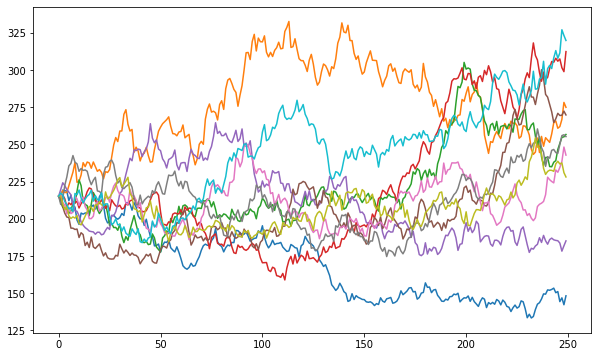

In [29]:
plt.figure(figsize=(10,6))
plt.plot(price_list);

### Note: We have simulated the possibilities for the MSFT stock price using Monte-Carlo simulations 